In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
df = pd.read_excel("D:\\SEMESTER 5\\CSE303 ML\\ENB2012_data.xlsx")

df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
              'Overall_Height', 'Orientation', 'Glazing_Area',
              'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'] #Renaming columns

In [24]:
df = df.drop(columns=['Cooling_Load'])

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB
None


In [26]:
print(df.describe())

       Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

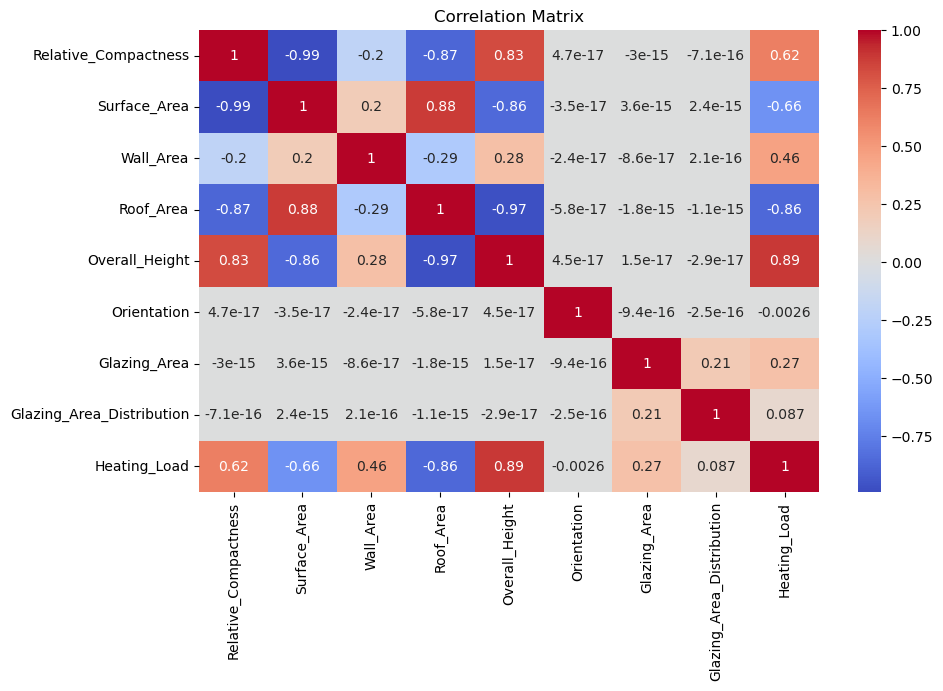

In [27]:
#Correlational Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

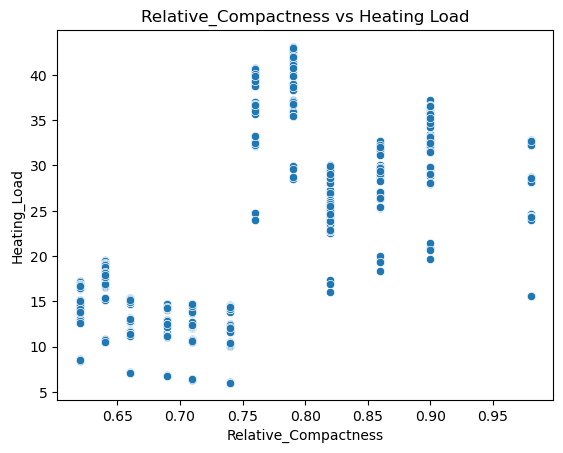

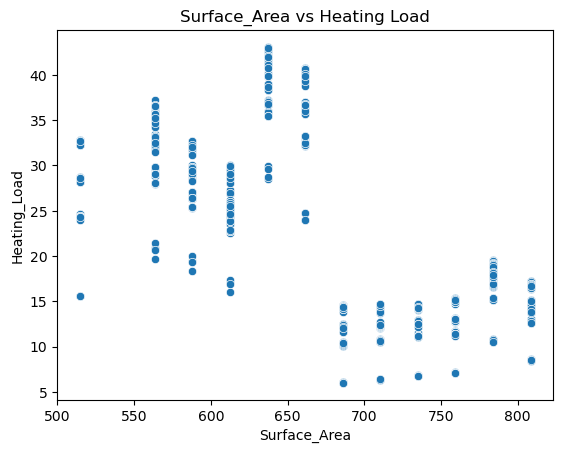

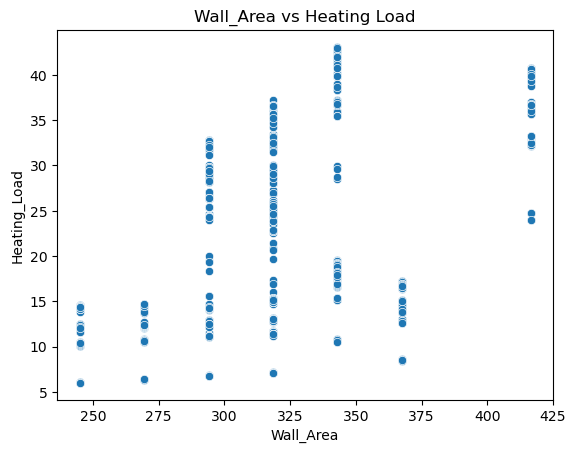

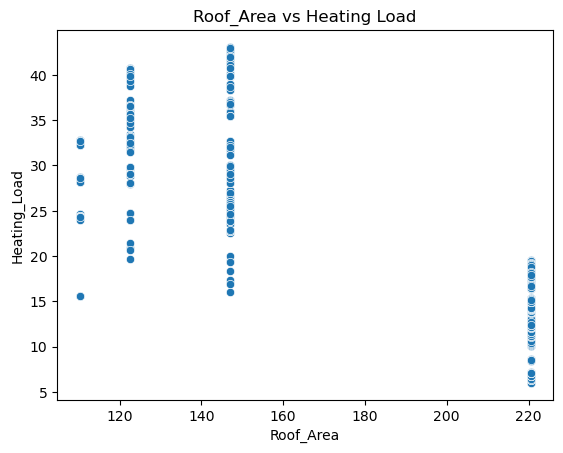

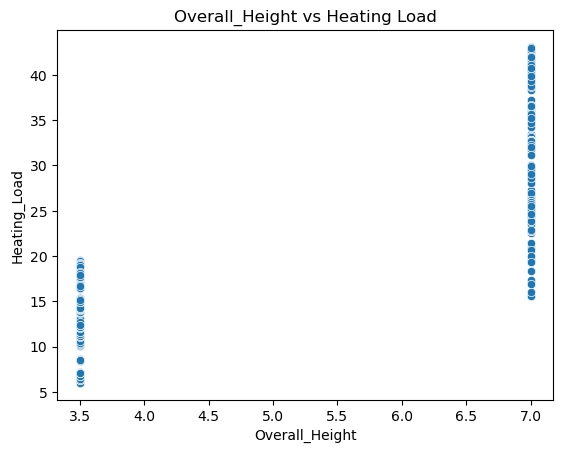

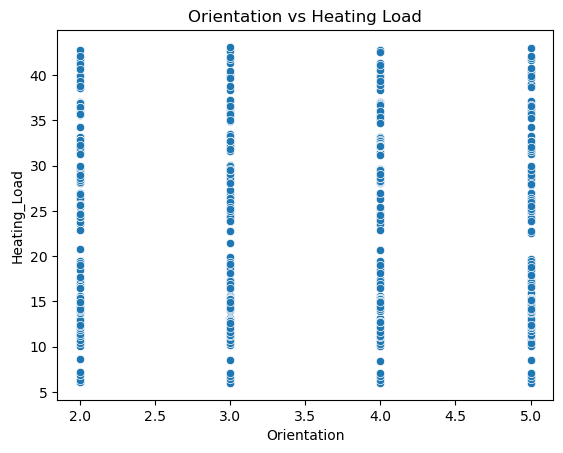

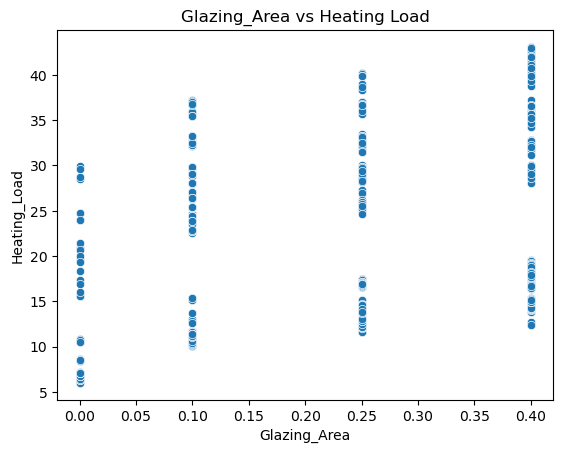

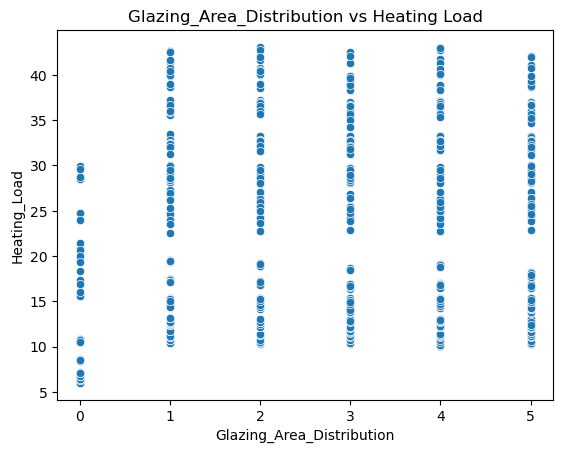

In [28]:
for col in df.columns[:-1]:
    sns.scatterplot(x=col, y='Heating_Load', data=df)
    plt.title(f"{col} vs Heating Load")
    plt.show()

In [29]:
df = pd.read_excel("D:\\SEMESTER 5\\CSE303 ML\\ENB2012_data.xlsx")

df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
              'Overall_Height', 'Orientation', 'Glazing_Area',
              'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'] #Renaming columns

In [30]:
df = df.drop(columns=['Heating_Load'])

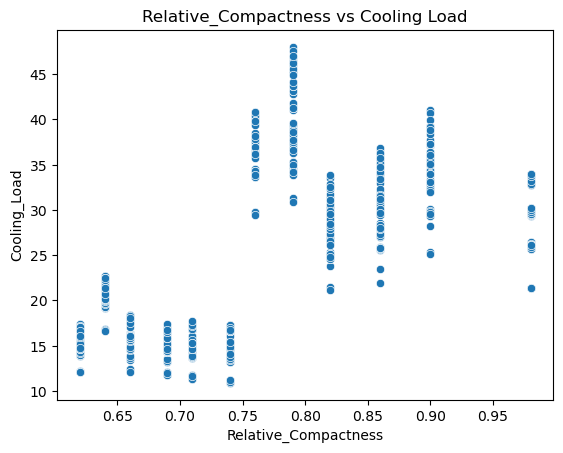

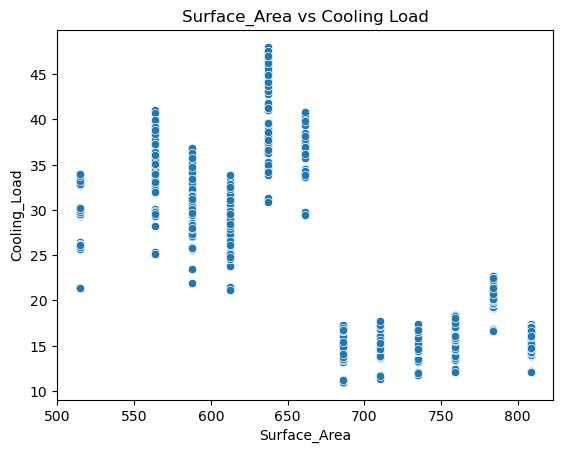

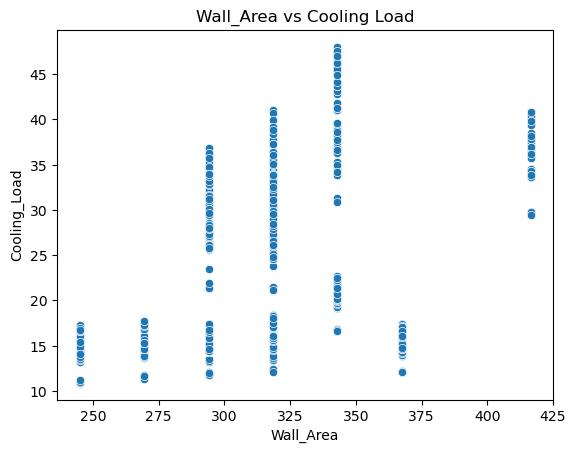

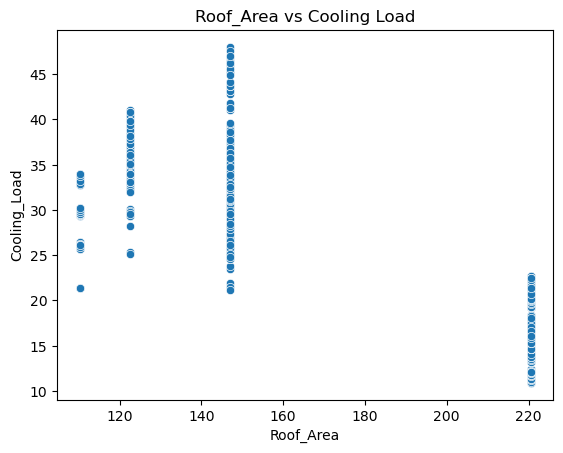

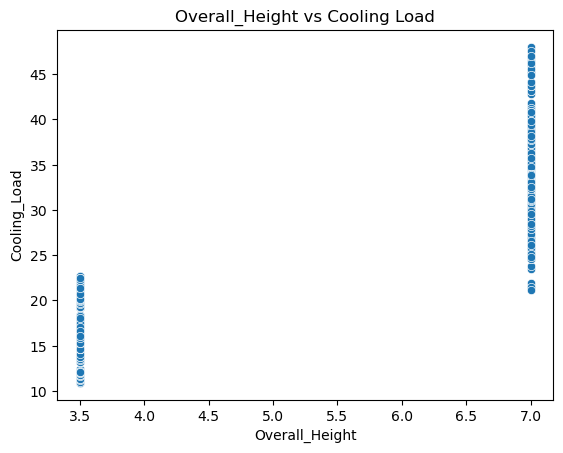

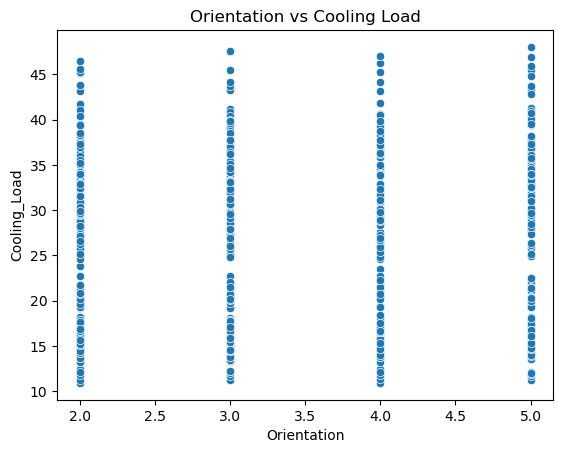

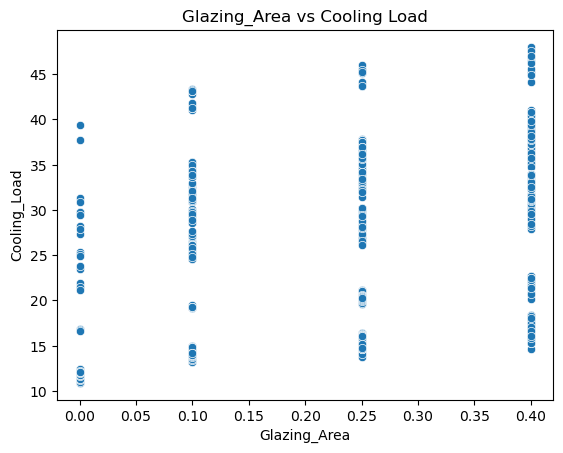

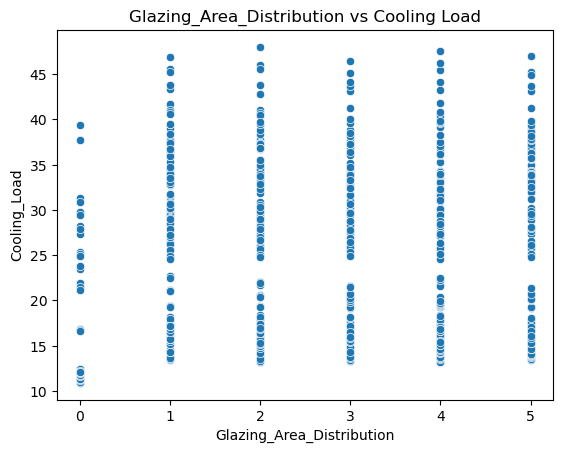

In [31]:
for col in df.columns[:-1]:
    sns.scatterplot(x=col, y='Cooling_Load', data=df)
    plt.title(f"{col} vs Cooling Load")
    plt.show()

In [32]:
X = df[['Relative_Compactness']]
y = df['Cooling_Load']

In [33]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

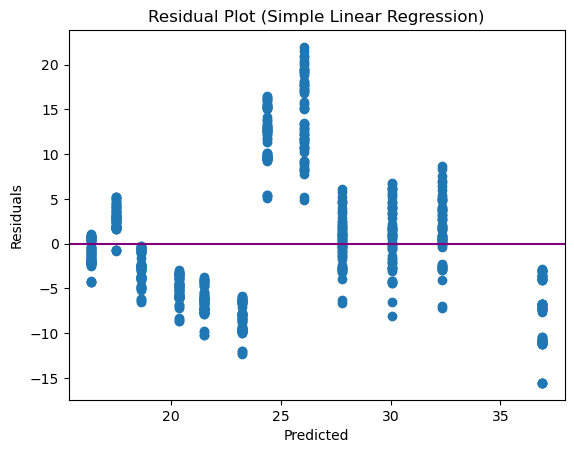

In [34]:
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='purple')
plt.title("Residual Plot (Simple Linear Regression)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [35]:
X = df.drop(columns='Cooling_Load')
y = df['Cooling_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)

In [36]:
def print_metrics(y_true, y_pred, dataset=""):
    print(f"---- {dataset} ----")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_absolute_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

print_metrics(y_train, y_train_pred, "Training")
print_metrics(y_test, y_test_pred, "Testing")

---- Training ----
MAE: 2.273077893694804
MSE: 10.217139265901034
RMSE: 1.5076730062234331
R2 Score: 0.8860445121790158
---- Testing ----
MAE: 2.2027783003334083
MSE: 9.802148870724876
RMSE: 1.4841759667685663
R2 Score: 0.8942106498831226


In [37]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

print_metrics(y_train, y_train_pred_poly, "Training (poly)")
print_metrics(y_test, y_test_pred_poly, "Testing (poly)")

---- Training (poly) ----
MAE: 1.5551898482257458
MSE: 4.173257045509965
RMSE: 1.2470725112140617
R2 Score: 0.9534541391629443
---- Testing (poly) ----
MAE: 1.9538790752361341
MSE: 5.8836590833673625
RMSE: 1.3978122460602977
R2 Score: 0.9365008143675881


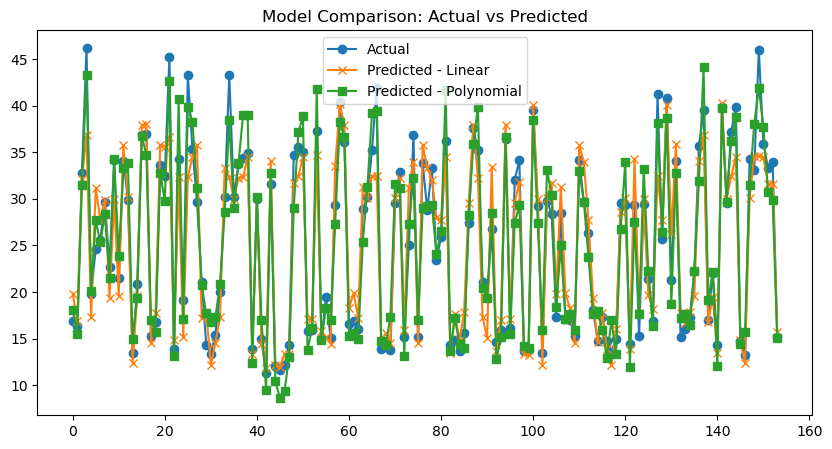

In [38]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_test_pred, label='Predicted - Linear', marker='x')
plt.plot(y_test_pred_poly, label='Predicted - Polynomial', marker='s')
plt.legend()
plt.title("Model Comparison: Actual vs Predicted")
plt.show()

In [39]:
from sklearn.model_selection import learning_curve

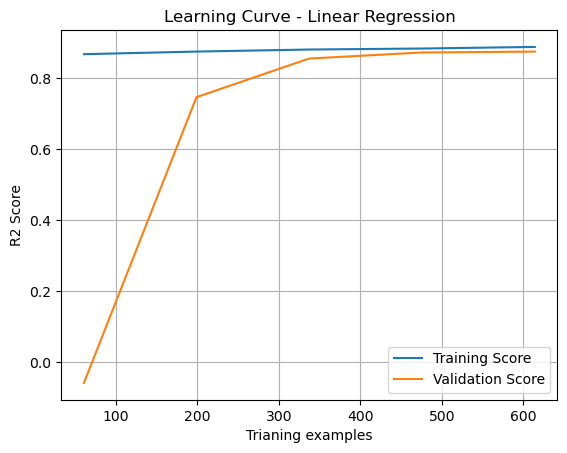

In [40]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X, y, cv=5, scoring='r2')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.title("Learning Curve - Linear Regression")
plt.xlabel("Trianing examples")
plt.ylabel("R2 Score")
plt.legend()
plt.grid()
plt.show()

In [41]:
X = df['Relative_Compactness']
y = df['Cooling_Load']

In [42]:
X = df[['Relative_Compactness']]
y = df['Cooling_Load']

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

sorted_index = X.squeeze().argsort()
X_sorted = X.squeeze().values[sorted_index]
y_lin_sorted = y_pred_lin[sorted_index]
y_poly_sorted = y_pred_poly[sorted_index]


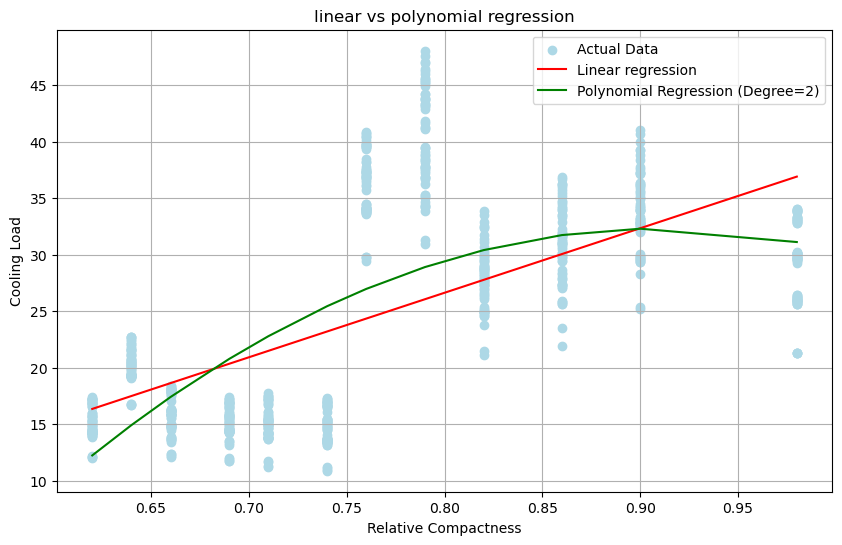

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='lightblue', label='Actual Data')
plt.plot(X_sorted, y_lin_sorted, color='red', label='Linear regression')
plt.plot(X_sorted, y_poly_sorted, color='Green', label='Polynomial Regression (Degree=2)')
plt.xlabel("Relative Compactness")
plt.ylabel("Cooling Load")
plt.title("linear vs polynomial regression")
plt.legend()
plt.grid(True)
plt.show()

In [65]:
X = df.drop(columns=['Heating_Load', 'Cooling_Load'])
y = df['Cooling_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lin = lr.predict(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
pr = LinearRegression()
pr.fit(X_train_poly, y_train)
y_pred_poly = pr.predict(X_test_poly)

KeyError: "['Heating_Load'] not found in axis"

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_lin, label='Linear regression', marker='s')
plt.plot(y_pred_poly, label='polynomial regression', marker='x')
plt.title("Model predition comparison: Actual vs linear vs Polynomial")
plt.xlabel("Test samples")
plt.ylabel("Cooling Load")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
X = df[['Relative_Compactness', 'Surface_Area']]
y = df['Cooling_Load']

lr = LinearRegression()
lr.fit(X,y)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
pr = LinearRegression()
pr.fit(X_poly, y)

rc_range = np.linspace(X['Relative_Compactness'].min(), X['Relative_Compactness'].max(), 30)
sa_range = np.linspace(X['Surface_Area'].min(), X['Surface_Area'].max(), 30)
rc_grid, sa_grid = np.meshgrid(rc_range, sa_range)

grid_points = np.c_[rc_grid.ravel(), sa_grid.ravel()]
y_lin_pred = lr.predict(grid_points).reshape(rc_grid.shape)

grid_poly = poly.transform(grid_points)
y_poly_pred = pr.predict(grid_poly).reshape(rc_grid.shape)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


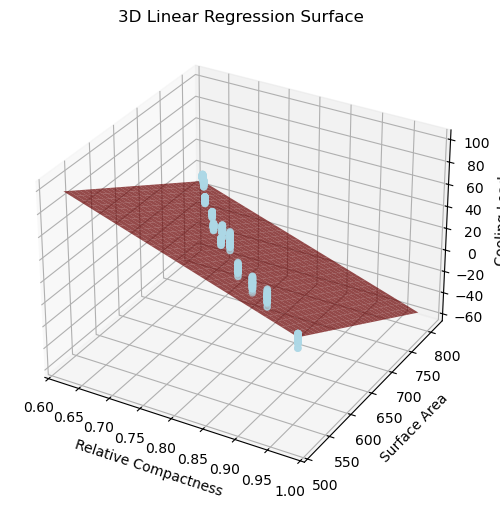

In [46]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X['Relative_Compactness'], X['Surface_Area'], y, color='lightblue', alpha=0.5)
ax1.plot_surface(rc_grid, sa_grid, y_lin_pred, color='red', alpha=0.7)
ax1.set_title("3D Linear Regression Surface")
ax1.set_xlabel("Relative Compactness")
ax1.set_ylabel("Surface Area")
ax1.set_zlabel("Cooling Load")

plt.show()

Text(0.5, 0, 'Cooling Load')

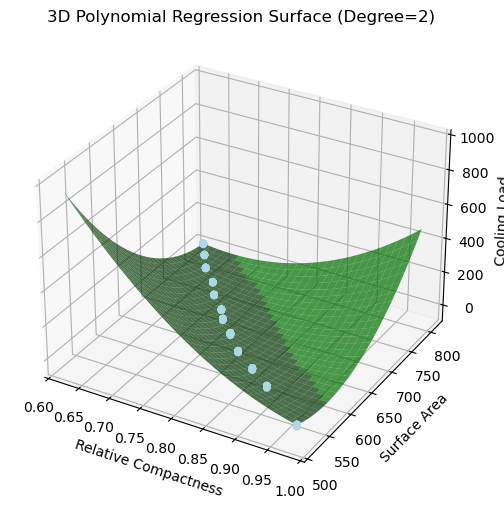

In [47]:
fig = plt.figure(figsize=(16,6))
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X['Relative_Compactness'], X['Surface_Area'], y, color='lightblue', alpha=0.5)
ax2.plot_surface(rc_grid, sa_grid, y_poly_pred, color='green', alpha=0.7)
ax2.set_title("3D Polynomial Regression Surface (Degree=2)")
ax2.set_xlabel("Relative Compactness")
ax2.set_ylabel("Surface Area")
ax2.set_zlabel("Cooling Load")

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

In [56]:
y_binary = (df['Relative_Compactness'] > df['Relative_Compactness'].median()).astype(int)
X = df[['Cooling_Load']]
X_train, X_test, yb_train, yb_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
lr = LinearRegression()
lr.fit(X_train_scaled, yb_train)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_lr_bin = (y_pred_lr > 0.5).astype(int)

In [64]:
logr = LogisticRegression()
logr.fit(X_train_scaled, yb_train)
y_pred_logr = logr.predict(X_test_scaled)
y_prob_logr = logr.predict_proba(X_test_scaled)[:, 1]

In [63]:
print("Linear Regression (converted to classifier)")
print(classification_report(yb_test, y_pred_lr_bin))
print("ROC-AUC:", roc_auc_score(yb_test, y_pred_lr))


print("\nLogistic Regression")
print(classification_report(yb_test, y_pred_logr))
print("ROC-AUC:", roc_auc_score(yb_test, y_prob_logr))

Linear Regression (converted to classifier)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.98      0.99       123

    accuracy                           0.99       231
   macro avg       0.99      0.99      0.99       231
weighted avg       0.99      0.99      0.99       231

ROC-AUC: 0.9994730502860584

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.99      1.00       123

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

ROC-AUC: 0.9994730502860584


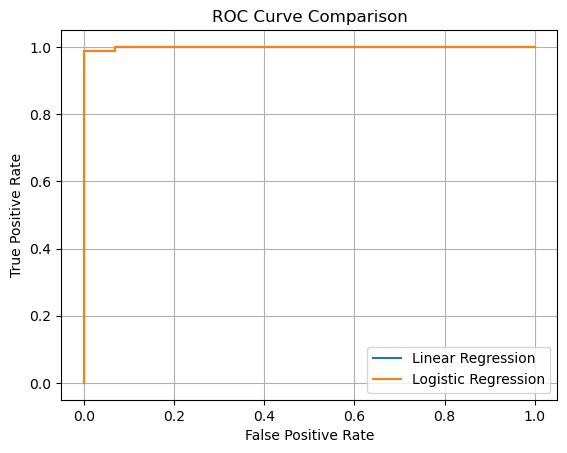

In [55]:
fpr_lr, tpr_lr, _ = roc_curve(yb_test, y_pred_lr)
fpr_logr, tpr_logr, _ = roc_curve(yb_test, y_prob_logr)

plt.plot(fpr_lr, tpr_lr, label='Linear Regression')
plt.plot(fpr_logr, tpr_logr, label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_preds = lin_model.predict(X_test)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

=== Linear Regression (used for classification) ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.97      0.98       160

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

ROC-AUC (Linear): 0.9779771959459459

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.97      0.98       160

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

ROC-AUC (Logistic): 0.9879856418918919


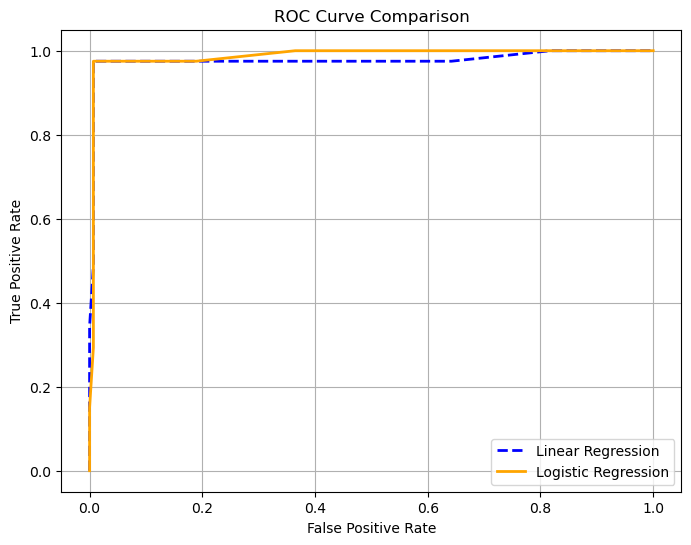

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Step 1: Load the dataset
df = pd.read_excel("D:\\SEMESTER 5\\CSE303 ML\\ENB2012_data.xlsx")

# Step 2: Rename columns (based on original dataset info)
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]

# Step 3: Create a binary target from Cooling_Load
# 1 if Cooling_Load > median, else 0
df['Target'] = (df['Cooling_Load'] > df['Cooling_Load'].median()).astype(int)

# Step 4: Select features for classification (you can choose others too)
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area']]
y = df['Target']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 6: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Linear Regression model (used as a classifier)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_lin_bin = (y_pred_lin > 0.5).astype(int)

# Step 8: Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Step 9: Evaluation
print("=== Linear Regression (used for classification) ===")
print(classification_report(y_test, y_pred_lin_bin))
print("ROC-AUC (Linear):", roc_auc_score(y_test, y_pred_lin))

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC (Logistic):", roc_auc_score(y_test, y_prob_log))

# Step 10: Plot ROC curves
fpr_lin, tpr_lin, _ = roc_curve(y_test, y_pred_lin)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lin, tpr_lin, label="Linear Regression", linestyle='--', color='blue', linewidth=2)
plt.plot(fpr_log, tpr_log, label="Logistic Regression", linestyle='-', color='orange', linewidth=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

Key Questions / Analysis / Interpretation to be Evaluated

**Q1. Did you find if patterns are linear or nonlinear?**  
- Scatter plots show straight-line vs curved patterns.  
- Residual plots detect nonlinearity.  
- Polynomial regression handles nonlinear cases.  

**Q2. Did you select relevant features using correlation?**  
- Correlation matrix shows important features.  
- Weak features can be ignored.  
- Multicollinearity check avoids redundancy.  

**Q3. Did you build a predictive model and interpret coefficients?**  
- Regression coefficients explain feature impact.  
- Positive → increases heating load.  
- Negative → decreases heating load.  

**Q4. Did you calculate MAE, MSE, RMSE, and R²?**  
- MAE = average error size.  
- RMSE penalizes larger errors.  
- R² = model’s fit (closer to 1 is better).  

**Q5. Did you check for overfitting?**  
- Compare training vs testing error.  
- Low train error + high test error = overfitting.  
- Regularization/polynomial control helps.

*Practical 4 — Energy consumption prediction*

RMSE: 4.921767474134796
R2: 0.8458624735889597


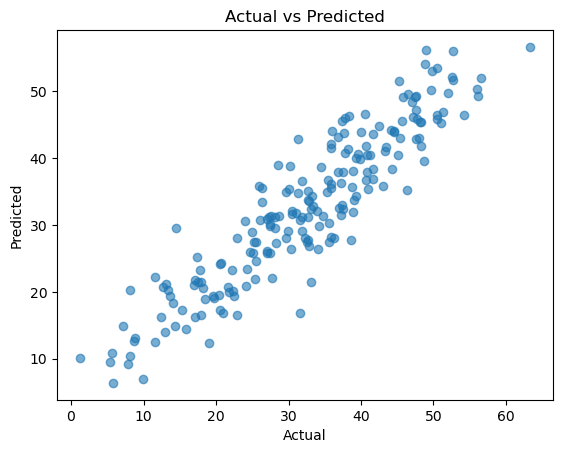

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

fn = 'energy_weather.csv'
if os.path.exists(fn):
    df = pd.read_csv(fn, parse_dates=['date'])
else:
    np.random.seed(1)
    n=1000
    temp = np.random.uniform(10,40,size=n)
    occupancy = np.random.randint(0,50,size=n)
    hour = np.random.randint(0,24,size=n)
    consumption = 0.5*temp + 0.8*occupancy + 2*(hour>18) + np.random.normal(0,5,size=n)
    df = pd.DataFrame({'temp':temp,'occupancy':occupancy,'hour':hour,'consumption':consumption})

X = df[['temp','occupancy','hour']]
y = df['consumption']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = LinearRegression().fit(X_train,y_train)
pred = model.predict(X_test)
print('RMSE:', root_mean_squared_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

plt.scatter(y_test,pred, alpha=0.6); plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Predicted'); plt.show()
